In [110]:
## Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
import plotly.express as px

## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, recall_score, f1_score
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
# from tensorflow_core.estimator import inputs


In [111]:
df = pd.read_csv('DataCo.csv', encoding='ISO-8859-1')

In [112]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [113]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

# Data Cleaning

check for missing values:

In [114]:
missing_values = df.isnull().sum()
print(missing_values)

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [115]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [116]:
df.shape

(180519, 53)

Dropping unnecessary columns

In [117]:
df = df.drop(['Customer Email'
              , 'Customer Fname'
              , 'Customer Lname'
              ,'Product Status'
              ,'Customer Password'
              ,'Customer Street'
              ,'Customer Fname'
              ,'Customer Lname'
              ,'Latitude'
              ,'Longitude'
              ,'Product Description'
              ,'Product Image'
              ,'Order Zipcode'
              ,'shipping date (DateOrders)'], axis=1)

In [118]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

In [119]:
df['order date (DateOrders)']

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order date (DateOrders), Length: 180519, dtype: datetime64[ns]

Splitting Order dates and creating new columns

In [120]:
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

Drop 'order date (DateOrders)' after splitted

In [121]:
df = df.drop(['order date (DateOrders)'], axis=1)

Fill null in Customer Zipcode

In [122]:
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)

Days of Late

In [123]:
df['late_days'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

In [124]:
df['late_days']

0        -1
1         1
2         0
3        -1
4        -2
         ..
180514    0
180515    1
180516    1
180517   -1
180518    0
Name: late_days, Length: 180519, dtype: int64

## Data Visualization

Check proportion of Late Delivery Risk

<Axes: ylabel='Late_delivery_risk'>

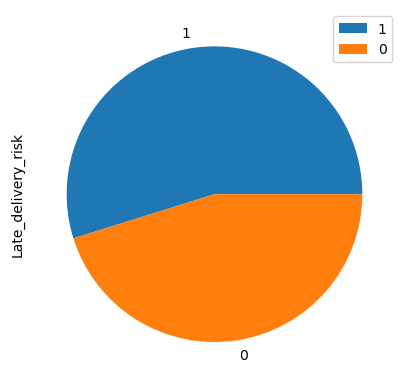

In [125]:
df['Late_delivery_risk'].value_counts().plot.pie(legend = ["0", "1"])

Check status of orders

In [126]:
status = df.groupby('Type')['Order Status'].value_counts()
status

Type      Order Status   
CASH      CLOSED             19616
DEBIT     COMPLETE           59491
          ON_HOLD             9804
PAYMENT   PENDING_PAYMENT    39832
          PAYMENT_REVIEW      1893
TRANSFER  PROCESSING         21902
          PENDING            20227
          SUSPECTED_FRAUD     4062
          CANCELED            3692
Name: Order Status, dtype: int64

Check Order Country and Market

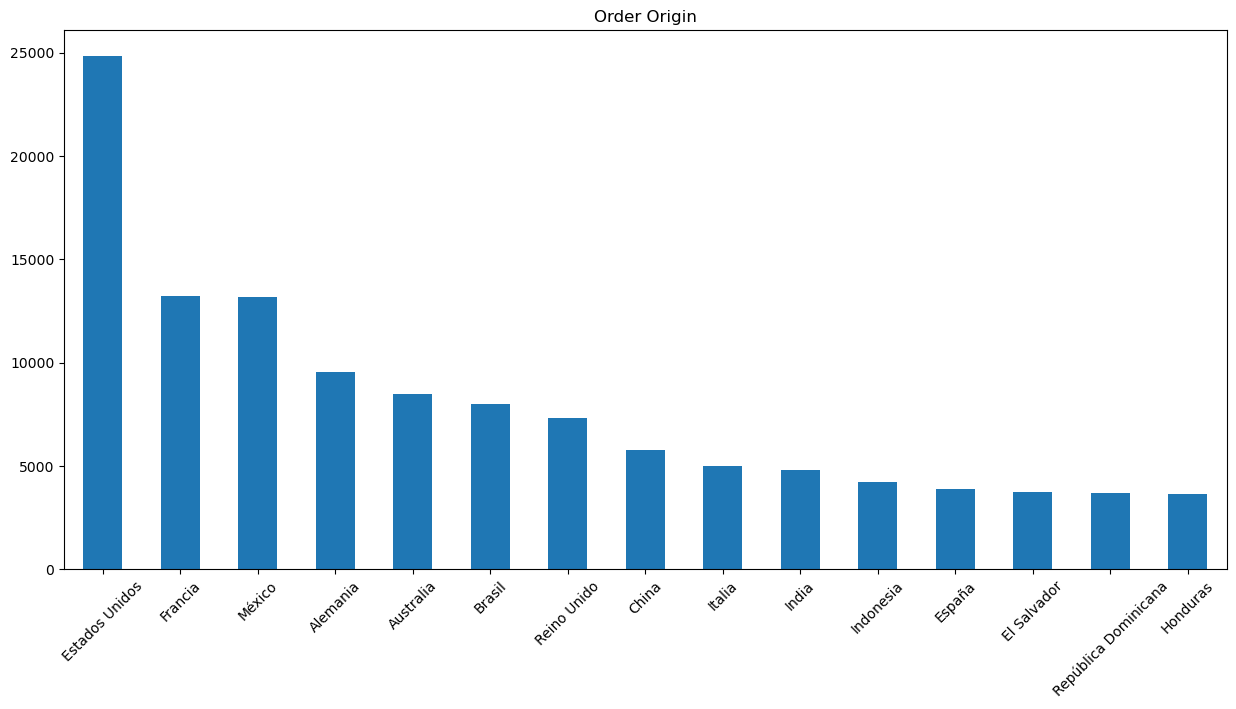

In [127]:
top_15_countries = df['Order Country'].value_counts().nlargest(15)

plt.figure(figsize=(15, 7))
top_15_countries.plot(kind='bar', title="Order Origin")
plt.xticks(rotation=45)
plt.show()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LATAM'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Pacific Asia'),
  Text(3, 0, 'USCA'),
  Text(4, 0, 'Africa')])

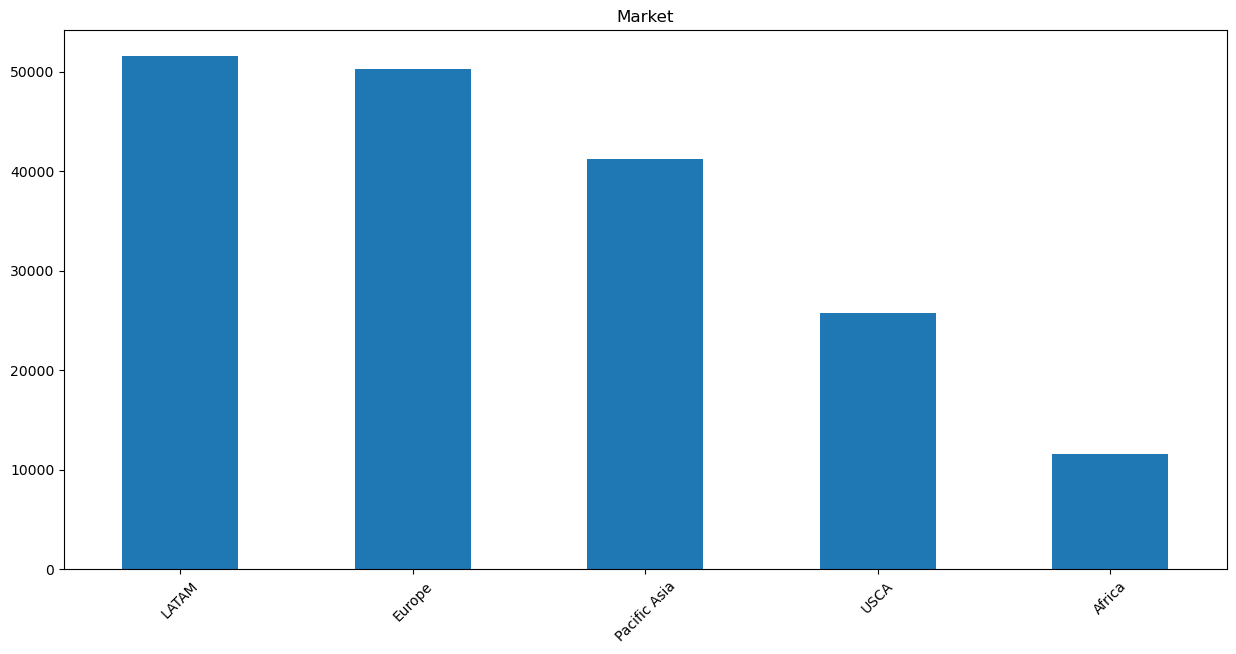

In [128]:
plt.figure(2)
df['Market'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Market")
plt.xticks(rotation = 45)

Check shipping mode

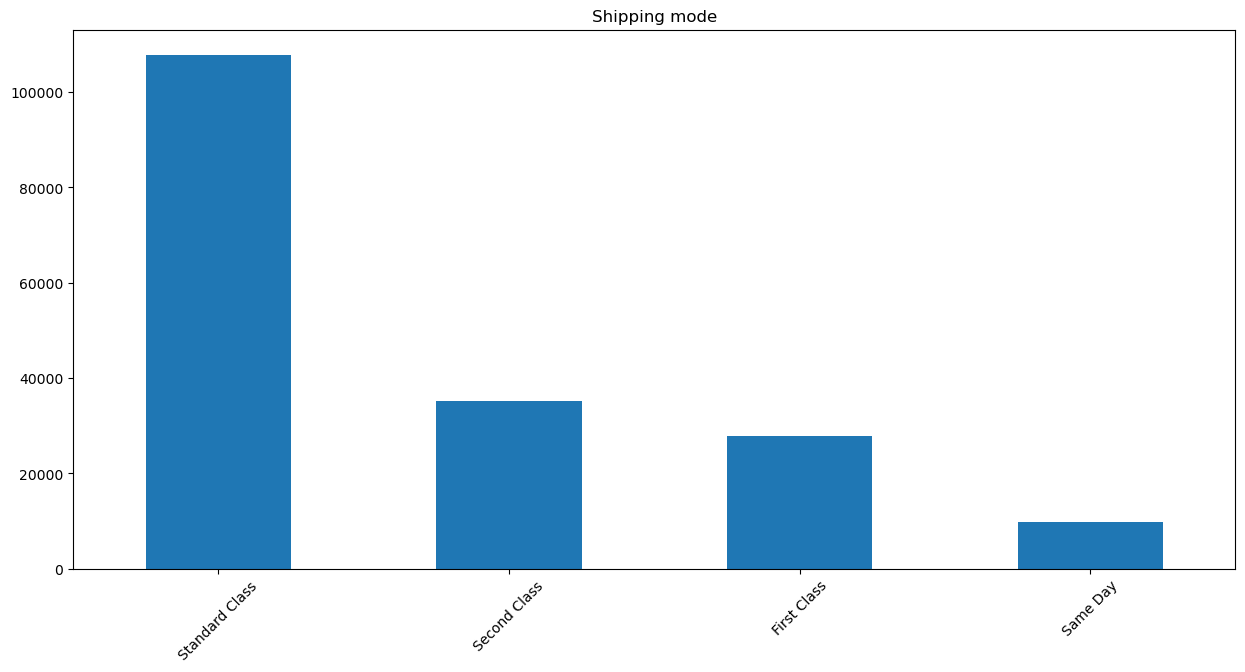

In [129]:
shipping_mode = df['Shipping Mode'].value_counts()

plt.figure(figsize=(15, 7))
shipping_mode.plot(kind='bar', title="Shipping mode")
plt.xticks(rotation=45)
plt.show()

Check Department of Goods

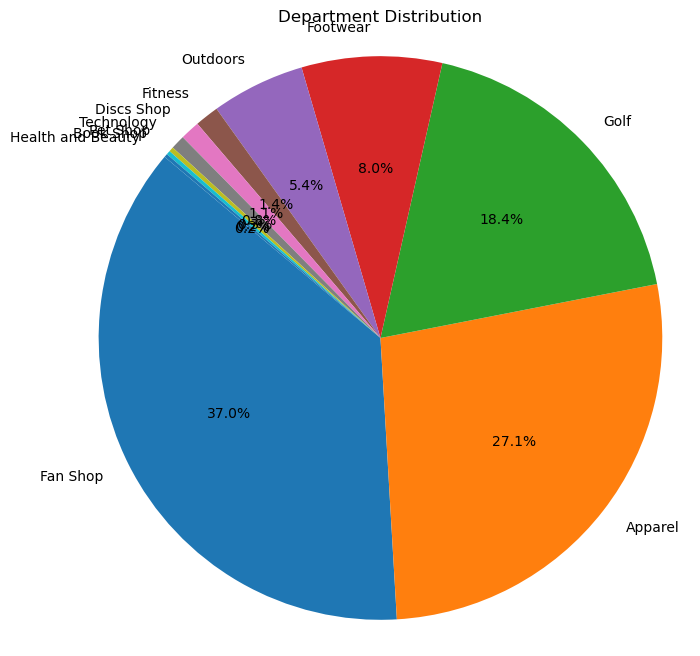

In [130]:
department_counts = df['Department Name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Department Distribution")

plt.show()

Check if loss after promo

In [131]:
loss = len(df[df['Benefit per order'] <= 0])
earn = len(df[df['Benefit per order'] > 0])

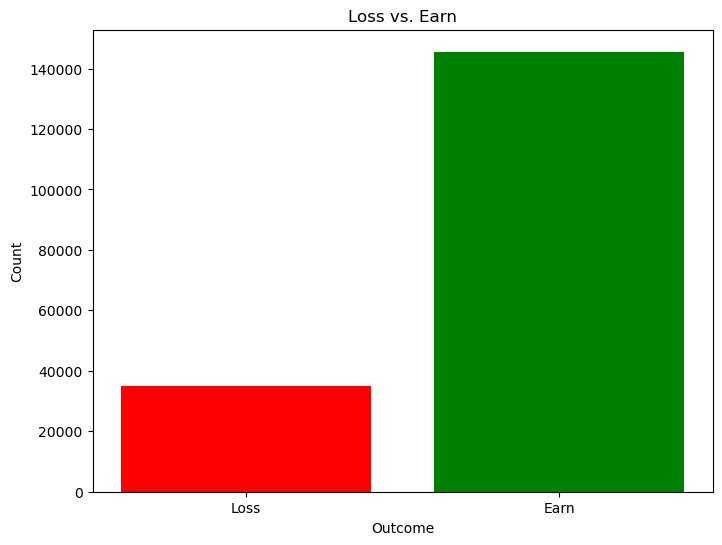

In [132]:
categories = ['Loss', 'Earn']
counts = [loss, earn]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['red', 'green'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Loss vs. Earn')

plt.show()

Correlation Matrix

C:\Users\tanis\AppData\Local\Temp\ipykernel_33816\2055723654.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



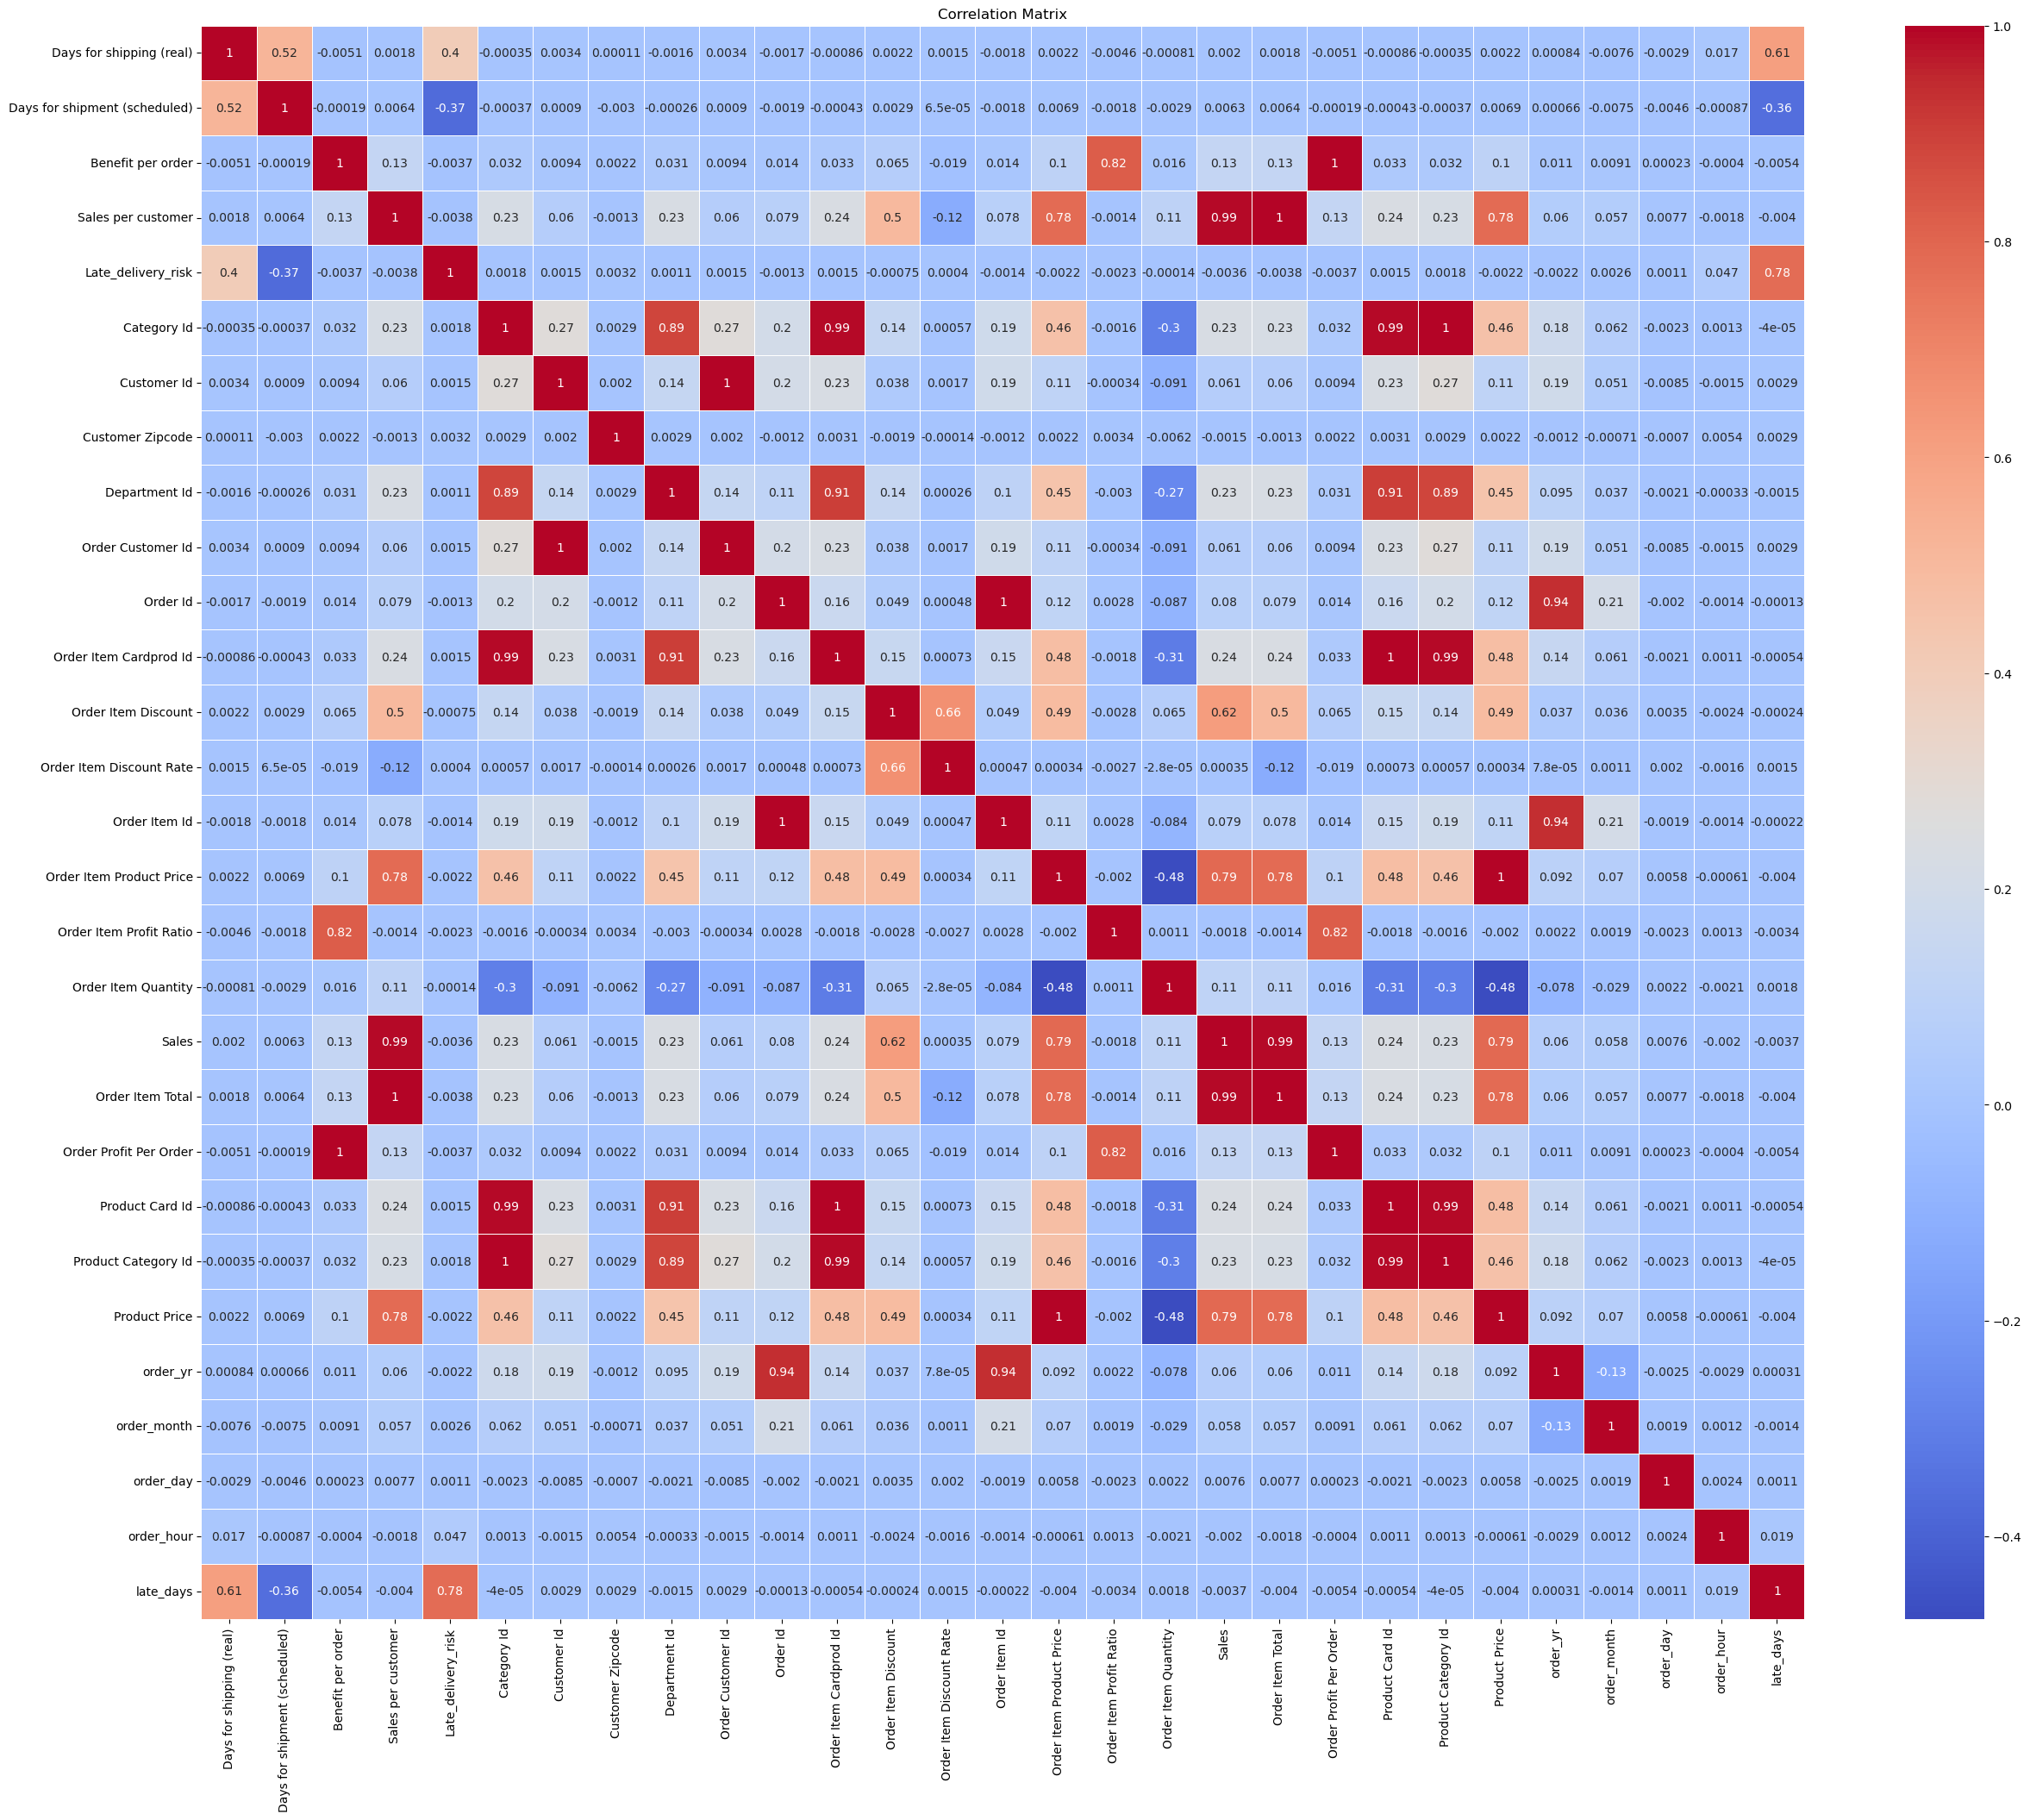

In [133]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

we find out there're strong correlation (>0.7) between Late Delivery Risk and 

# Neural Networks Predicting Late Risk

## Variable Selection and Encode 

In [134]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Shipping Mode', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'late_days'],
      dtype='object')

Create training df

In [135]:
train_df = df.copy()

In [136]:
train_df. columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Shipping Mode', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'late_days'],
      dtype='object')

Removing Late_delivery_risk, Devlivery status value in the df as these are value we try to predict

In [137]:
train_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Disco

Encode all Categorical Object Variables

In [138]:
label_encoder = LabelEncoder()
columns_to_encode = ['Type'
                       , 'Category Name'
                       , 'Customer City'
                       , 'Customer Country'
                       , 'Customer Segment'
                       , 'Customer State'
                       ,'Delivery Status'
                       , 'Department Name'
                       , 'Market'
                       , 'Order City'
                       , 'Order Country'
                       , 'Order Region'
                       , 'Order State'
                       , 'Order Status'
                       , 'Product Name'
                       , 'Shipping Mode']

for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])

Redo the Correlation MAatrix to see all veriables aafter encoded

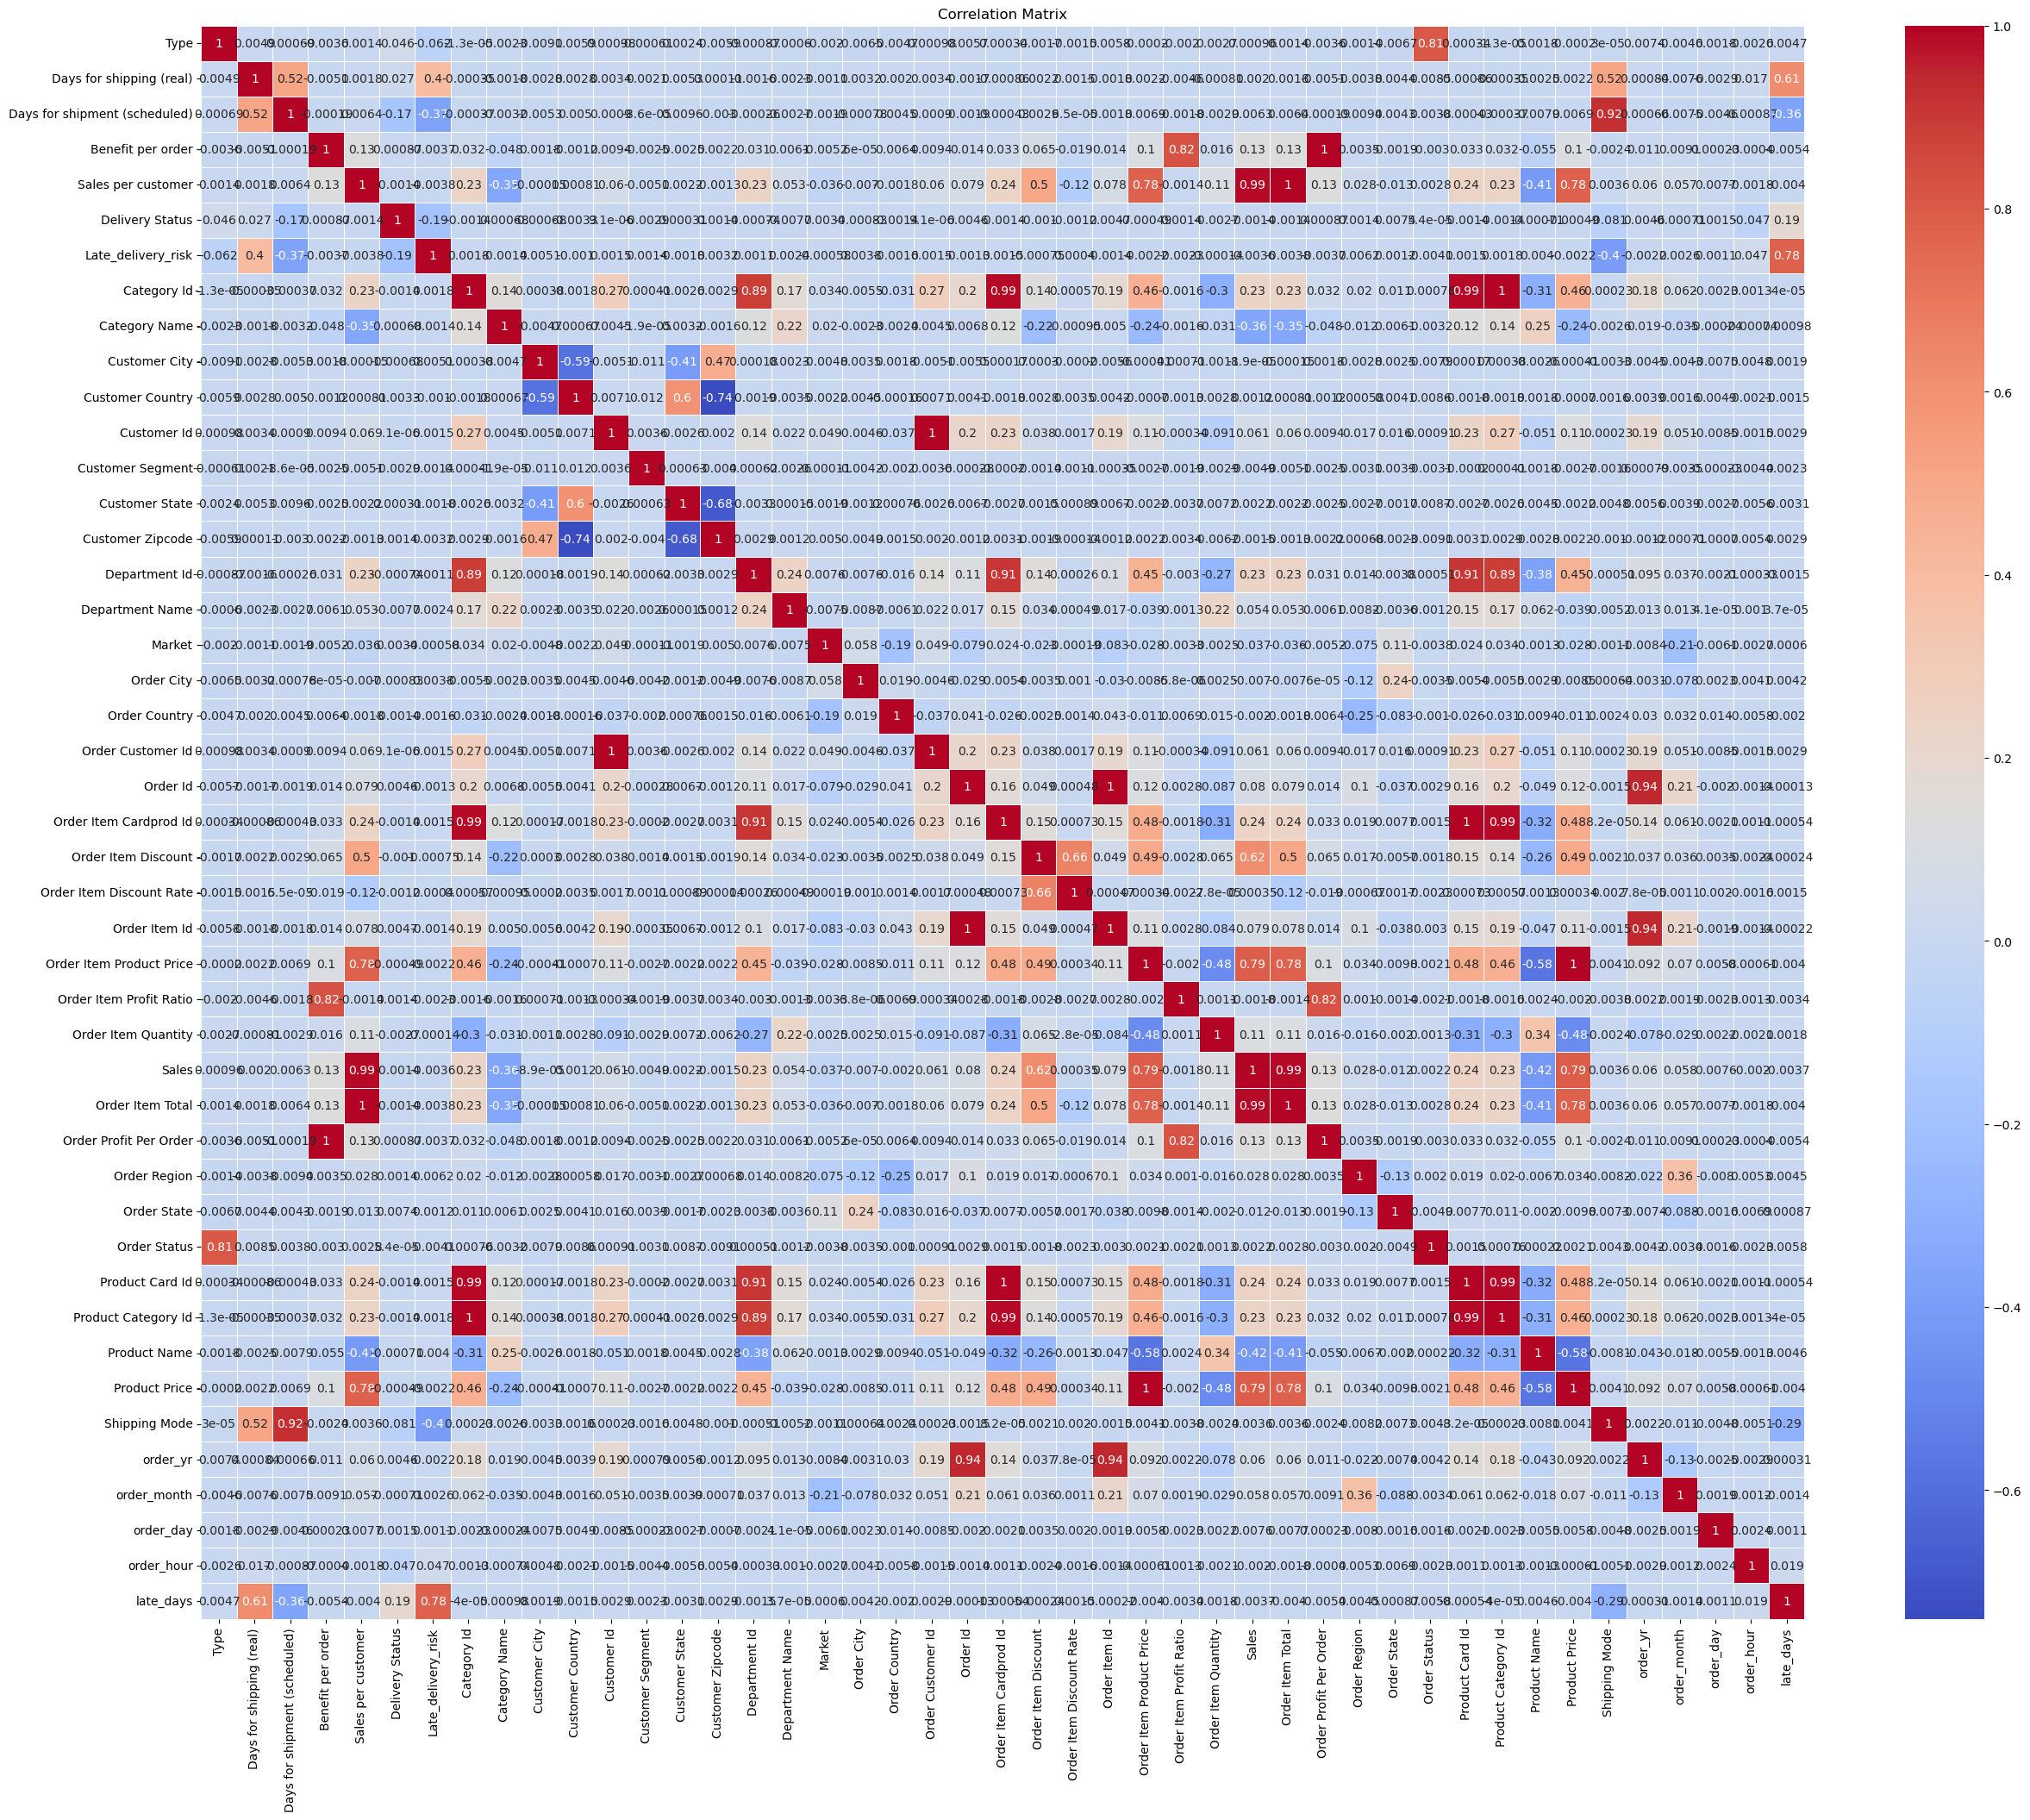

In [139]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [140]:
train_df.dtypes

Type                               int32
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                    int32
Late_delivery_risk                 int64
Category Id                        int64
Category Name                      int32
Customer City                      int32
Customer Country                   int32
Customer Id                        int64
Customer Segment                   int32
Customer State                     int32
Customer Zipcode                 float64
Department Id                      int64
Department Name                    int32
Market                             int32
Order City                         int32
Order Country                      int32
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Disco

In [141]:
train_df.shape

(180519, 45)

## Choosing predictors and outcome

Drop "Days for shipping (real)", "Days for shipment (scheduled)" as already created late_days column

In [142]:
train_df.drop(["Days for shipping (real)", "Days for shipment (scheduled)", "Delivery Status"], axis=1, inplace=True)

Using Random Forest to figure which variable to select for X - predictors

In [143]:
# Create a Random Forest classifier for feature selection
rf = RandomForestClassifier(n_estimators=45, random_state=42)

# Fit the classifier to your data for feature selection
X = train_df.drop(columns=['Late_delivery_risk'])
y = train_df['Late_delivery_risk']
rf.fit(X, y)

# Use feature importances to select the top N features
num_features_to_select = 5
selector = SelectFromModel(rf, max_features=num_features_to_select)
selector.fit(X, y)

# Get the selected feature indices and feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Select only the top features
X_new = X[selected_feature_names]

In [144]:
X_new.columns

Index(['Order Status', 'Shipping Mode', 'late_days'], dtype='object')

In [145]:
# Define predictors (selected features) and outcome
predictors = X_new
outcome = y

# Split the data for training and validation
train_X, valid_X, train_y, valid_y = train_test_split(predictors, outcome, test_size=0.4, random_state=0)

## One layer - 3 nodes

In [146]:
# train neural network with 3 hidden nodes *
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)

clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X_scaled, train_y.values)


MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [147]:
# training performance
classificationSummary(train_y, clf.predict(train_X))
# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8325)

       Prediction
Actual     0     1
     0 46972  1852
     1 16288 43199
Confusion Matrix (Accuracy 0.8306)

       Prediction
Actual     0     1
     0 31426  1292
     1 10939 28551


C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



We continue to check beyond the Accuracy rate by checking recall, f1 and ROC_AUC

In [148]:
#Make predictions on the validation data
predictions = clf.predict(train_X)

# Calculate Recall
recall = recall_score(train_y, predictions)

# Calculate F1-Score
f1 = f1_score(train_y, predictions)

# Calculate ROC AUC
roc_auc = roc_auc_score(train_y, clf.predict_proba(train_X)[:, 1])

# Display the results
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# Generate the ROC curve (optional)
fpr, tpr, thresholds = roc_curve(train_y, clf.predict_proba(train_X)[:, 1])


C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



Recall: 0.7261922773042849
F1-Score: 0.8264745834050776
ROC AUC: 0.9399710243373899


In [149]:
#Make predictions on the validation data
predictions = clf.predict(valid_X)

# Calculate Recall
recall = recall_score(valid_y, predictions)

# Calculate F1-Score
f1 = f1_score(valid_y, predictions)

# Calculate ROC AUC
roc_auc = roc_auc_score(valid_y, clf.predict_proba(valid_X)[:, 1])

# Display the results
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# Generate the ROC curve (optional)
fpr, tpr, thresholds = roc_curve(valid_y, clf.predict_proba(valid_X)[:, 1])


C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



Recall: 0.7229931628260319
F1-Score: 0.8235904980312405
ROC AUC: 0.9400065982792928


C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



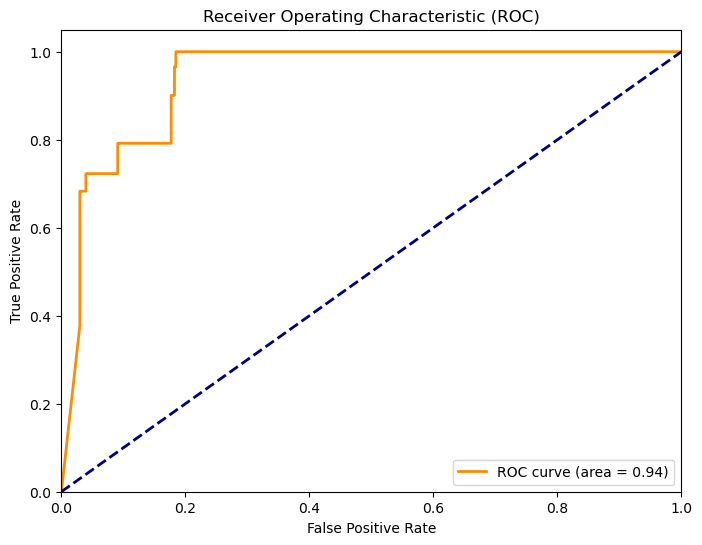

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(valid_y, clf.predict_proba(valid_X)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


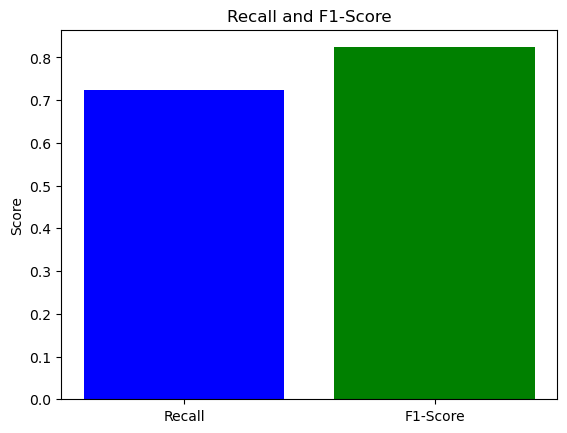

In [151]:
# Create a bar chart for Recall and F1-Score
metrics = ['Recall', 'F1-Score']
values = [recall, f1]

plt.bar(metrics, values, color=['blue', 'green'])
plt.ylabel('Score')
plt.title('Recall and F1-Score')
plt.show()


Recall (Sensitivity or True Positive Rate): Recall is a measure of a model's ability to correctly identify all relevant instances (true positives) among the total number of actual positive instances (true positives + false negatives). In your case, a recall of approximately 0.723 means that the model correctly identified about 72.3% of the actual positive instances.

High Recall: A high recall indicates that the model is good at capturing positive cases, minimizing false negatives. It's important when missing positive cases can have significant consequences.
F1-Score: The F1-Score is the harmonic mean of precision and recall. It balances precision (the ability to correctly classify positive predictions) and recall. It provides a single metric that summarizes both precision and recall. In your case, an F1-Score of approximately 0.824 indicates a good balance between precision and recall.

High F1-Score: A high F1-Score is desirable when you want both high precision and high recall, especially when the class distribution is imbalanced.
ROC AUC (Receiver Operating Characteristic Area Under the Curve): ROC AUC is a measure of a model's ability to distinguish between the positive and negative classes. It quantifies the model's overall ability to rank examples correctly. An ROC AUC of approximately 0.940 suggests that the model has excellent discriminatory power.

High ROC AUC: A high ROC AUC indicates that the model can effectively differentiate between positive and negative cases. It's a measure of the model's overall performance.

## Two layers - 3 nodes

In [152]:
# train neural network with 2 hidden layers and a total of 6 nodes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)

# Define the architecture with two hidden layers
clf = MLPClassifier(hidden_layer_sizes=(3, 3), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X_scaled, train_y.values)


MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [153]:
# training performance
classificationSummary(train_y, clf.predict(train_X))
# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8629)

       Prediction
Actual     0     1
     0 46616  2208
     1 12642 46845
Confusion Matrix (Accuracy 0.8616)

       Prediction
Actual     0     1
     0 31188  1530
     1  8467 31023


C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



5 folded Cross Validation 

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Define your classifier and preprocessing steps (e.g., scaling) here
clf = MLPClassifier(hidden_layer_sizes=(3, 3), activation='logistic', solver='lbfgs', random_state=1)
scaler = StandardScaler()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, train_X, train_y, cv=5)  # 5-fold cross-validation

# Print the average accuracy and standard deviation
print("Average Accuracy: {:.2f}%".format(100 * cv_scores.mean()))
print("Standard Deviation: {:.2f}".format(100 * cv_scores.std()))

Average Accuracy: 97.86%
Standard Deviation: 0.05


In [157]:

# Create an instance of MLPClassifier and a StandardScaler
clf = MLPClassifier(hidden_layer_sizes=(3, 3), activation='logistic', solver='lbfgs', random_state=1)
scaler = StandardScaler()

# Fit the model with the training data
train_X_scaled = scaler.fit_transform(train_X)
clf.fit(train_X_scaled, train_y)

# Make predictions on the validation data
predictions = clf.predict(valid_X)

# Calculate Recall on validation data
recall = recall_score(valid_y, predictions)

# Calculate F1-Score on validation data
f1 = f1_score(valid_y, predictions)

# Calculate ROC AUC on validation data
roc_auc = roc_auc_score(valid_y, clf.predict_proba(valid_X)[:, 1])

# Display the results
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# Generate the ROC curve on validation data (optional)
fpr, tpr, thresholds = roc_curve(valid_y, clf.predict_proba(valid_X)[:, 1])


Recall: 0.7855912889339073
F1-Score: 0.8612356509306942
ROC AUC: 0.9250402702306972


C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



In [158]:

# Create an instance of MLPClassifier and a StandardScaler
clf = MLPClassifier(hidden_layer_sizes=(3, 3), activation='logistic', solver='lbfgs', random_state=1)
scaler = StandardScaler()

# Fit the model with the training data
train_X_scaled = scaler.fit_transform(train_X)
clf.fit(train_X_scaled, train_y)

# Make predictions on the training data
train_predictions = clf.predict(train_X)

# Calculate Recall on training data
train_recall = recall_score(train_y, train_predictions)

# Calculate F1-Score on training data
train_f1 = f1_score(train_y, train_predictions)

# Calculate ROC AUC on training data
train_roc_auc = roc_auc_score(train_y, clf.predict_proba(train_X)[:, 1])

# Display the results for the training data
print("Train Recall:", train_recall)
print("Train F1-Score:", train_f1)
print("Train ROC AUC:", train_roc_auc)

# Generate the ROC curve on training data (optional)
fpr_train, tpr_train, thresholds_train = roc_curve(train_y, clf.predict_proba(train_X)[:, 1])


Train Recall: 0.7874829794745071
Train F1-Score: 0.86318407960199
Train ROC AUC: 0.9265564701993623


C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



## Three layers - 3 nodes

In [159]:
# train neural network with 2 hidden layers and a total of 6 nodes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)

# Define the architecture with two hidden layers
clf = MLPClassifier(hidden_layer_sizes=(3, 3,3), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X_scaled, train_y.values)


MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 3, 3),
              random_state=1, solver='lbfgs')

In [160]:
# training performance
classificationSummary(train_y, clf.predict(train_X))
# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.7203)

       Prediction
Actual     0     1
     0 47669  1155
     1 29139 30348
Confusion Matrix (Accuracy 0.7177)

       Prediction
Actual     0     1
     0 31917   801
     1 19580 19910


C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\tanis\anaconda3\python\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

